In [1]:
# Import the tools needed:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from warnings import filterwarnings
filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')


In [2]:
# Import csv files
test = pd.read_csv('test (2).csv')
X = pd.read_csv("train (3).csv")
test2 = pd.read_csv('test (2).csv')


# 1. View and understand the data:

In [3]:
X.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
print('Data has a dimension of the X data', X.shape )

Data has a dimension of the X data (8693, 14)


In [6]:
print('Data has a dimension of the test data', test.shape)


Data has a dimension of the test data (4277, 13)


In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

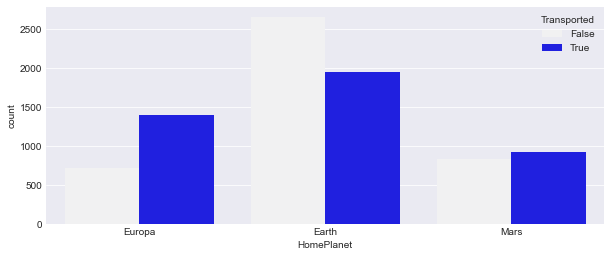

In [8]:
# HomePlanet and Survivors
plt.figure(figsize=(10, 4))
sns.countplot(data=X, x='HomePlanet', hue='Transported',color='blue')


<AxesSubplot:xlabel='Destination', ylabel='count'>

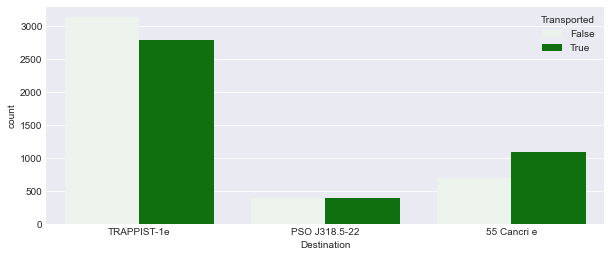

In [9]:
# Destination and Survivors
plt.figure(figsize=(10, 4))
sns.countplot(data=X, x='Destination', hue='Transported',color='green')


<AxesSubplot:>

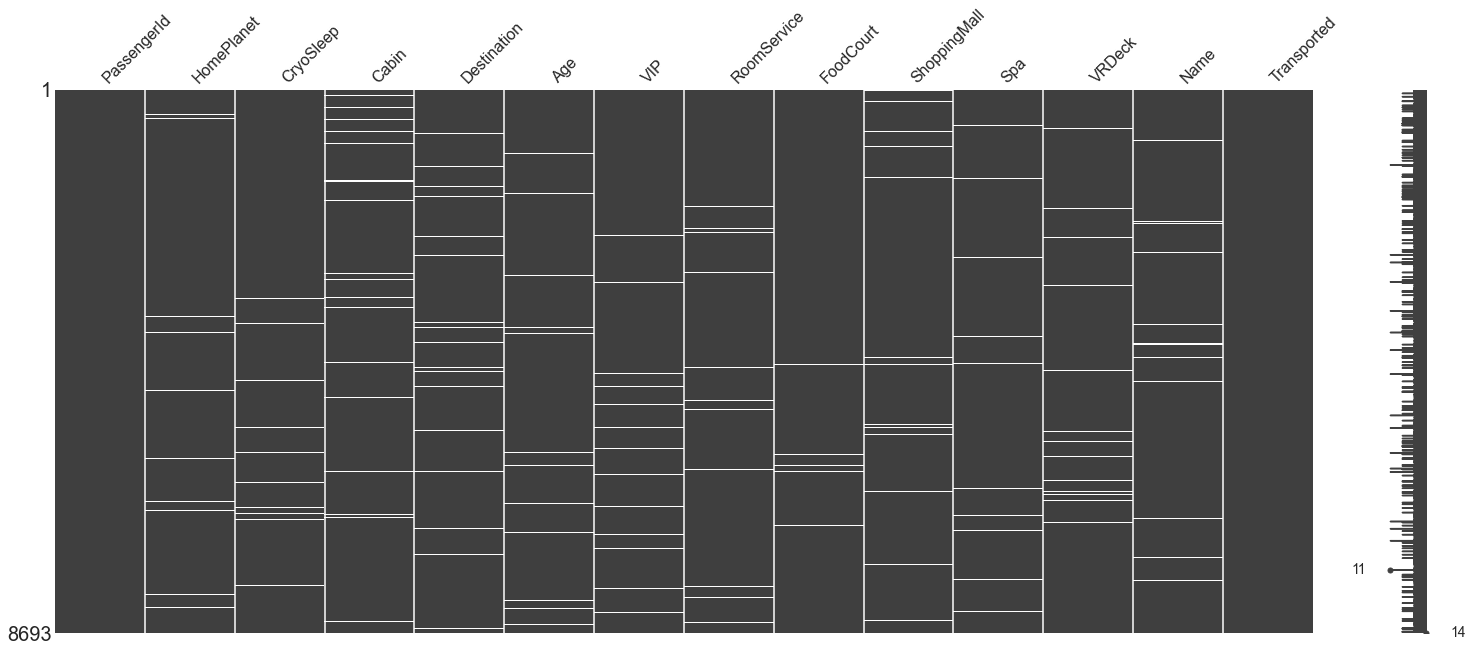

In [10]:
# Visualizing missing values for the X data

msno.matrix(X)


<AxesSubplot:>

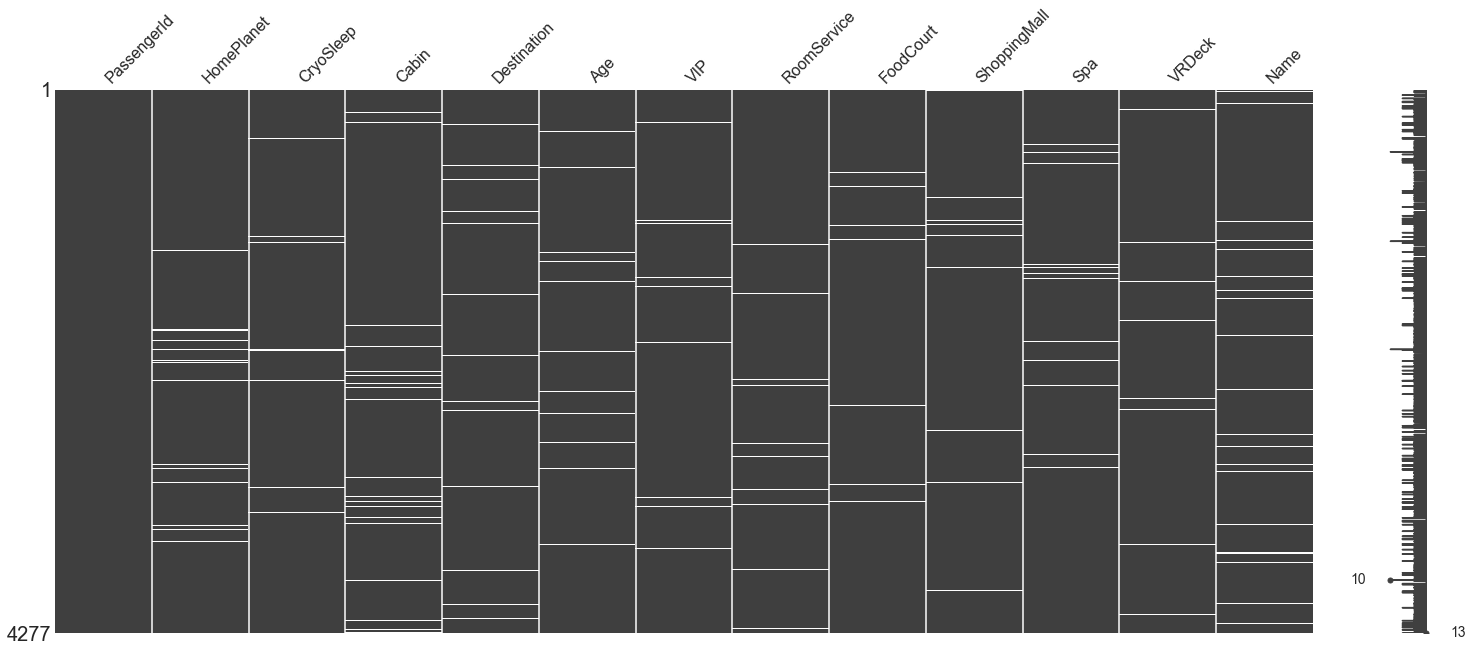

In [11]:
# Visualizing missing values from the test data
msno.matrix(test)


# 2. Data Cleaning

In [12]:
def data_cleaning(df,test):
  """Clean the data 
  1. Replace Nans
  2. Fillna
  3. drop columns
  4. Create New columns"""
  try:
    X['Cabin'].fillna(method="ffill",inplace=True)
    test['Cabin'].fillna(method="ffill", inplace=True)

    X['Age'].fillna(value=X['Age'].mean(),inplace=True)
    test['Age'].fillna(value=test['Age'].mean(),inplace=True)

    X['RoomService'].fillna(value=0, inplace=True)
    test['RoomService'].fillna(value=0,inplace=True)

    X['FoodCourt'].fillna(value=0, inplace=True)
    test['FoodCourt'].fillna(value=0, inplace=True)

    X['ShoppingMall'].fillna(value=0, inplace=True)
    test['ShoppingMall'].fillna(value=0, inplace=True)

    X['Spa'].fillna(value=0, inplace=True)
    test['Spa'].fillna(value=0, inplace=True)

    X['VRDeck'].fillna(value=0, inplace=True)
    test['VRDeck'].fillna(value=0, inplace=True)

    X['RoomService'].fillna(value=0, inplace=True)
    test['RoomService'].fillna(value=0, inplace=True)

    X['FoodCourt'].fillna(value=0, inplace=True)
    test['FoodCourt'].fillna(value=0, inplace=True)

    X['ShoppingMall'].fillna(value=0, inplace=True)
    test['ShoppingMall'].fillna(value=0, inplace=True)

    X['Spa'].fillna(value=0, inplace=True)
    test['Spa'].fillna(value=0, inplace=True)

    X['VRDeck'].fillna(value=0, inplace=True)
    test['VRDeck'].fillna(value=0, inplace=True)

    X['HomePlanet'].fillna(method ='bfill', inplace=True)
    test['HomePlanet'].fillna(method='bfill', inplace=True)

    X['CryoSleep'].fillna(X['CryoSleep'].mode()[0], inplace=True)
    test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace=True)

    X['VIP'].fillna(X['VIP'].mode()[0], inplace=True)
    test['VIP'].fillna(test['VIP'].mode()[0], inplace=True)

    X['Destination'].fillna(method="ffill", inplace=True)
    test['Destination'].fillna(method="ffill", inplace=True)

    X['Name'] = X['Name'].fillna(method='ffill')
    test['Name']=test['Name'].fillna(method='ffill')

    return X,test
  except:
    print('This function is not working')
data_cleaning(X,test)
X.isnull().sum()


PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [13]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# 3. Feature Engineering

In [14]:
X.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [15]:
X[X['Age']<=16]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
20,0017_02,Earth,False,F/6/P,55 Cancri e,14.0,False,412.0,0.0,1.0,0.0,679.0,Philda Brighttt,False
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,9239_01,Mars,False,E/593/P,TRAPPIST-1e,14.0,False,2.0,0.0,918.0,128.0,0.0,Per Minen,False
8663,9244_01,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock,True
8671,9253_01,Earth,True,G/1493/S,PSO J318.5-22,16.0,False,0.0,0.0,0.0,0.0,0.0,Jimmyn Thomason,True
8674,9257_01,Earth,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [16]:
def new_feat(X,test):
  """Adding new columns"""
  try:
    X[['Cabin','Cabin_num','Cabin_letter']] = X['Cabin'].str.split('/',expand = True)
    test[['Cabin', 'Cabin_num', 'Cabin_letter']] = test['Cabin'].str.split('/', expand=True)

    X['Speanding'] = X['RoomService'] + X['FoodCourt'] + X['ShoppingMall'] + X['Spa']
    test['Speanding'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa']

    X['Group'] = X['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    X['GroupSize'] = X['Group'].map(lambda x: X['Group'].value_counts()[x])

    test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    test['GroupSize'] = test['Group'].map(lambda x: test['Group'].value_counts()[x])



    return X,test
  except:
    print('New_feat function is not working')
new_feat(X,test)


(     PassengerId HomePlanet  CryoSleep Cabin    Destination   Age    VIP  \
 0        0001_01     Europa      False     B    TRAPPIST-1e  39.0  False   
 1        0002_01      Earth      False     F    TRAPPIST-1e  24.0  False   
 2        0003_01     Europa      False     A    TRAPPIST-1e  58.0   True   
 3        0003_02     Europa      False     A    TRAPPIST-1e  33.0  False   
 4        0004_01      Earth      False     F    TRAPPIST-1e  16.0  False   
 ...          ...        ...        ...   ...            ...   ...    ...   
 8688     9276_01     Europa      False     A    55 Cancri e  41.0   True   
 8689     9278_01      Earth       True     G  PSO J318.5-22  18.0  False   
 8690     9279_01      Earth      False     G    TRAPPIST-1e  26.0  False   
 8691     9280_01     Europa      False     E    55 Cancri e  32.0  False   
 8692     9280_02     Europa      False     E    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               

In [17]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_num,Cabin_letter,Speanding,Group,GroupSize
0,0001_01,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,P,0.0,1,1
1,0002_01,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,S,692.0,2,1
2,0003_01,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,S,10334.0,3,2
3,0003_02,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,S,4983.0,3,2
4,0004_01,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,S,1089.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,98,P,8462.0,9276,1
8689,9278_01,Earth,True,G,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,1499,S,0.0,9278,1
8690,9279_01,Earth,False,G,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1500,S,1873.0,9279,1
8691,9280_01,Europa,False,E,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,608,S,1402.0,9280,2


# 4. Encoding and Scaling

In [18]:
# Label Encoder
for i in X.columns:
    le = LabelEncoder()
    X[i] = le.fit_transform(X[i])

for i in test.columns:
    le = LabelEncoder()
    test[i] = le.fit_transform(test[i])


In [19]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_num,Cabin_letter,Speanding,Group,GroupSize
0,0,0,1,6,2,27,0,0,0,0,0,0,2912,820,1,0,0,0
1,1,0,0,5,2,19,0,0,9,0,724,0,2406,927,1,1187,1,0
2,2,1,1,2,0,32,0,0,0,0,0,0,3376,0,1,0,2,0
3,3,1,0,2,2,39,0,0,843,0,155,359,2711,1,1,1452,3,0
4,4,0,0,5,2,20,0,10,0,366,0,0,668,1029,1,323,4,0


In [20]:
scaler = MinMaxScaler()
for col in X.columns:
  X[[col]] = scaler.fit_transform(X[[col]])
for col in test.columns:
  test[[col]] = scaler.fit_transform(test[[col]])


In [21]:
X = pd.get_dummies(X)
test = pd.get_dummies(test)


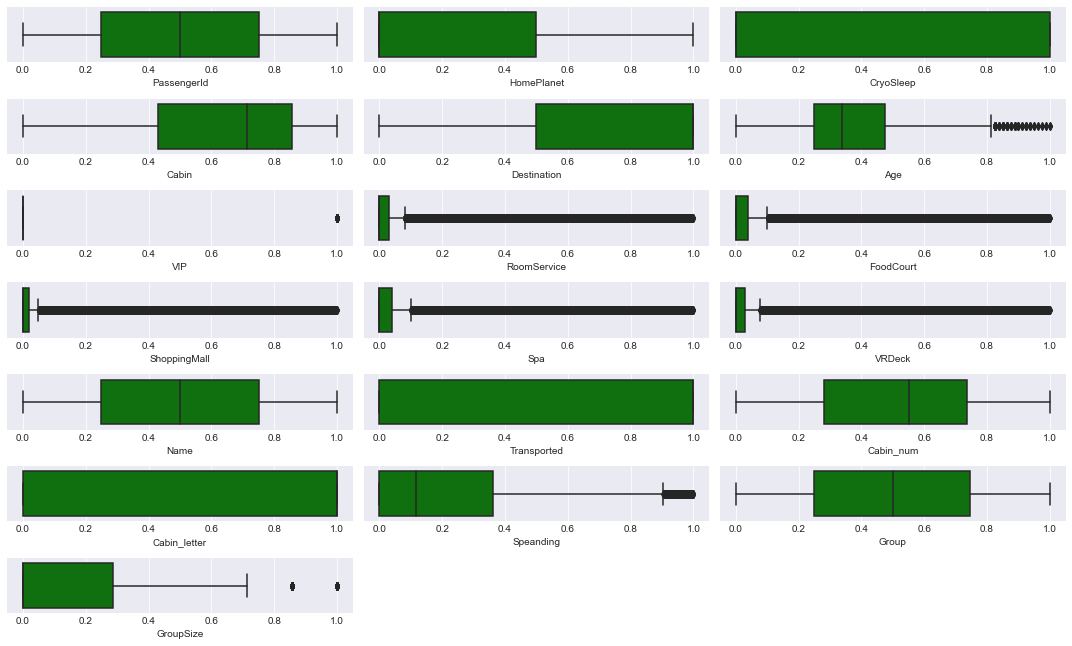

In [22]:
plt.figure(figsize=(15, 10))
for i, feat_num in enumerate(X):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(x=X[feat_num], color='g')
    plt.xlabel(feat_num)
    plt.tight_layout()


In [23]:
test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_num,Cabin_letter,Speanding,Group,GroupSize
0,0.000000,0.0,1.0,0.857143,1.0,0.341772,0.0,0.0,0.000000,0.0,0.000000,0.0,0.697485,0.545213,1.0,0.000000,0.000000,0.0
1,0.000234,0.0,0.0,0.714286,1.0,0.240506,0.0,0.0,0.009989,0.0,0.870192,0.0,0.576287,0.616356,1.0,0.751742,0.000327,0.0
2,0.000468,0.5,1.0,0.285714,0.0,0.405063,0.0,0.0,0.000000,0.0,0.000000,0.0,0.808623,0.000000,1.0,0.000000,0.000653,0.0


In [24]:
X.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Cabin_num', 'Cabin_letter', 'Speanding',
       'Group', 'GroupSize'],
      dtype='object')

<AxesSubplot:xlabel='CryoSleep', ylabel='Count'>

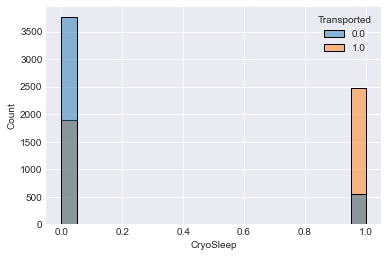

In [25]:
# Final View of data:
sns.histplot(data=X, x="CryoSleep", binwidth=0.05, hue="Transported")


# 5. Split data

In [26]:
X.drop(['PassengerId'],axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)
X.columns


Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Cabin_num', 'Cabin_letter', 'Speanding', 'Group',
       'GroupSize'],
      dtype='object')

In [27]:
y = X['Transported']
X = X.drop("Transported", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)


# 6. CatBoost

In [28]:
# Use Catboost
catmodel = CatBoostClassifier( iterations=1000, eval_metric='Accuracy', verbose=0)
catmodel.fit(X_train, y_train)
print(catmodel.score(X_test, y_test))

# Predicting
pred_cat = catmodel.predict(X_test)

# Converting into DataFrame
cat_submission = pd.concat([test2.PassengerId, pd.DataFrame(pred_cat)], axis='columns')
cat_submission.columns = ['PassengerId', 'Transported']
cat_submission.set_index('PassengerId')

# Turn numbers into bool
def transform_xgb(x):
    if x < 0.4:
        return False
    else:
        return True
# Add Transported to dataframe
cat_submission['Transported'] = cat_submission['Transported'].apply(transform_xgb)

# Save to csv file
cat_submission.to_csv('cat_submission_space', index=False)

# View final submission
cat_submission

0.8169273229070837


,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


# 7. XGBOOST

In [29]:
# Use XGBoost
m2 = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=-1)
m2.fit(X_train, y_train)
print(m2.score(X_test, y_test))

#Predicting
pred = m2.predict(X_test)
#Converting into DataFrame
xgb_submission = pd.concat([test2.PassengerId, pd.DataFrame(pred)], axis='columns')
xgb_submission.columns = ['PassengerId', 'Transported']
xgb_submission.set_index('PassengerId')

# Change into bool
def transform_xgb(x):
    if x < 0.4:
        return False
    else:
        return True
# Add Transported column
xgb_submission['Transported'] = xgb_submission['Transported'].apply(
    transform_xgb)

# Save sumbission to CSV file
xgb_submission.to_csv('xgb_submission_space', index=False)

# Final view
xgb_submission

[11:31:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.797148114075437


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
